In [81]:
import numpy as np
import pandas as pd
import seaborn as sns

In [82]:
N = 50
df = pd.DataFrame({'x':range(N)})
pendiente = 3
ruido = 50
ordenada = 30

In [83]:
df['y'] = df['x'].apply(lambda x: pendiente*x + ruido*(np.random.random() - 1/2) + ordenada)
df['ruido1'] = pd.Series(ruido * np.random.rand(N))

agregar = True
m = 45
if agregar:
    df_ruidoso = df.copy()
    for i in range(m):
        df_ruidoso['ruido'+ str(i)] = pd.Series(ruido * np.random.rand(N))


In [84]:
df.head()

,x,y,ruido1
0,0,28.076514,46.726684
1,1,50.750322,2.389017
2,2,35.964963,43.983081
3,3,50.504587,35.255110
4,4,52.008830,49.563905


<AxesSubplot:xlabel='x', ylabel='y'>

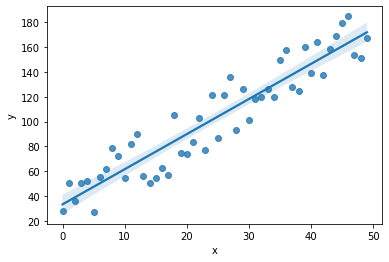

In [85]:
sns.regplot(data=df, x='x', y='y')

# Analisis con OLS sin extras

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

In [87]:
if agregar:
    X = df_ruidoso.drop(columns=['y'])
    y = df_ruidoso['y']
else:
    X = df.drop(columns=['y'])
    y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [88]:
model_OLS = LinearRegression(fit_intercept=True)

model_OLS.fit(X_train_std, y_train)

print(model_OLS.coef_)

print(model_OLS.intercept_)

[31.50618337  2.26128344  2.89513328  4.7270648   9.94149544 -8.38014576
 -3.67555859  4.09131445 -5.40190307  1.53384668 -1.37440473 -3.05150073
 -1.43967569 -5.50475457  1.90001378  0.98986191  0.75378154  1.99389297
 -1.19032139 -1.37896667 -3.08498332 -0.9038494   9.10228443  0.40081456
  3.84439123  7.09786613 -9.49270605 -2.24904707 -1.27024102 -5.2843583
  6.78167995 -2.27701035  0.20857273 -1.20418928 -5.01636206  1.71621046
 -1.27840394 -9.49288022  3.56204521  0.31563122  0.44398622 -1.46138471
  2.45498744 -7.12087954  2.75273799  0.5480143 ]
96.95600317952625


# Ahora ridge

In [89]:
model_ridge_cv = RidgeCV(alphas= [0.001, 0.01, 0.1, 0.3, 0.5, 1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 10.0], 
                                   fit_intercept=True, cv=10)
model_ridge_cv.fit(X_train_std, y_train)

print(model_ridge_cv.alpha_)

print(model_ridge_cv.coef_)

print(model_ridge_cv.intercept_)

10.0
[21.29397137  3.62570989  1.23799315  2.84217771  4.12427616 -2.41394196
 -2.66035199  0.75242819 -3.48955288 -0.33547031 -0.85524032 -0.78301089
  1.04514211 -3.45603215  3.06266569 -0.16286772  1.86249934  2.72643663
 -4.87998678 -0.31606553  1.34540537 -1.77011473  3.92951486  1.13344433
  3.32585709  7.67613504 -3.80870027 -3.13157926 -2.06098356 -4.1268275
  3.27836037 -3.02314792 -0.70163531  2.01334547 -1.92654587  3.87355578
  0.98578889 -3.42121583  0.52342164 -1.78014766  0.36568257 -0.45379797
  3.24848576 -3.79641792  0.70630183  3.95968146]
96.95600317952625


# Lasso

In [90]:
model_lasso_cv = LassoCV(alphas= [0.3, 0.5, 1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 2, 3, 6, 10.0], 
                                   fit_intercept=True, cv=10)
model_lasso_cv.fit(X_train_std, y_train)

print(model_lasso_cv.alpha_)

print(model_lasso_cv.coef_)

print(model_lasso_cv.intercept_)

6.0
[34.51250934  0.         -0.          0.          0.         -0.
 -0.         -0.         -0.          0.         -0.         -0.
 -0.         -0.          0.         -0.          0.          0.
 -0.         -0.         -0.         -0.          0.          0.
  0.          0.         -0.         -0.         -0.         -0.
  0.         -0.         -0.          0.         -0.          0.
 -0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.          0.        ]
96.95600317952625


In [91]:
# Comparamos metricas en train y en test

print ('Modelo OLS:\n')
print (f'Score (R^2) en train del modelo es {model_OLS.score(X_train_std, y_train)} y en test es {model_OLS.score(X_test_std, y_test)}')
print ('\n')

print ('Modelo Ridge:\n')
print (f'Score (R^2) en train del modelo es {model_ridge_cv.score(X_train_std, y_train)} y en test es {model_ridge_cv.score(X_test_std, y_test)}')
print ('\n')

print ('Modelo Lasso:\n')
print (f'Score (R^2) en train del modelo es {model_lasso_cv.score(X_train_std, y_train)} y en test es {model_lasso_cv.score(X_test_std, y_test)}')
print ('\n')

Modelo OLS:

Score (R^2) en train del modelo es 1.0 y en test es -0.1444438506806025


Modelo Ridge:

Score (R^2) en train del modelo es 0.9575401775494621 y en test es 0.2658566392394912


Modelo Lasso:

Score (R^2) en train del modelo es 0.850005078704729 y en test es 0.8436800057943826


